In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



#  Camera model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/IHS/IHS_output/training/train/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/IHS/IHS_output/testing/test/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/IHS/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/IHS/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape


# Model 1(camera)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
#output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)


# for camera model
dense_camera=Dense(8,activation='softmax')(dense1)
output_camera = dense_camera

# camera model

model_camera = Model(inputs= inp1, outputs = output_camera)
model_camera.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history= model_camera.fit(X1_train,Y1_train, batch_size=128,epochs=15,validation_data=(X1_test,Y1_test))



Epoch 1/15
16/16 [==============================] - 33s 2s/step - loss: 2.0798 - accuracy: 0.1317 - val_loss: 2.0665 - val_accuracy: 0.1250
Epoch 2/15
16/16 [==============================] - 24s 1s/step - loss: 2.0300 - accuracy: 0.1407 - val_loss: 2.0191 - val_accuracy: 0.1225
Epoch 3/15
16/16 [==============================] - 23s 1s/step - loss: 1.9619 - accuracy: 0.1701 - val_loss: 1.9937 - val_accuracy: 0.2175
Epoch 4/15
16/16 [==============================] - 23s 1s/step - loss: 1.9180 - accuracy: 0.2703 - val_loss: 1.9079 - val_accuracy: 0.3125
Epoch 5/15
16/16 [==============================] - 23s 1s/step - loss: 1.8115 - accuracy: 0.3458 - val_loss: 1.8161 - val_accuracy: 0.3375
Epoch 6/15
16/16 [==============================] - 23s 1s/step - loss: 1.7345 - accuracy: 0.3552 - val_loss: 1.7801 - val_accuracy: 0.3325
Epoch 7/15
16/16 [==============================] - 23s 1s/step - loss: 1.6757 - accuracy: 0.3738 - val_loss: 1.7387 - val_accuracy: 0.3375
Epoch 8/15
16/16 [==

In [2]:

#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_camera.evaluate(X1_test,Y1_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

4/4 [==============================] - 1s 268ms/step - loss: 1.3586 - accuracy: 0.4900
[INFO] Accuracy: 49.00%
[INFO] Loss: 1.358589768409729
Time:  0:00:01.242695


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


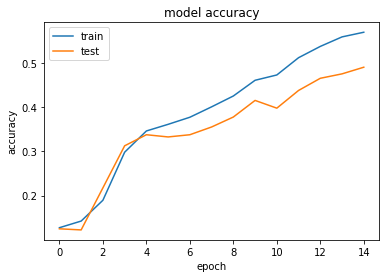

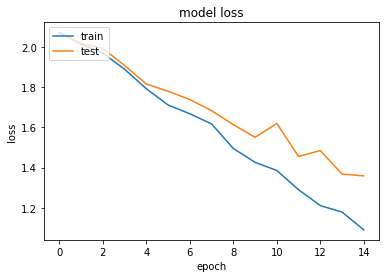

In [3]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Input image: table_plate4_IHS.jpg

probality of chair_bottle:  3.987797722220421

probality of plate_bottle:  0.8850634098052979

probality of spectacle_laptop:  0.6723824888467789

probality of table_bottle:  10.90317815542221

probality of table_chair:  24.66793656349182

probality of table_laptop:  23.10328036546707

probality of table_plate:  20.97504585981369

probality of table_spectacle:  14.80531096458435


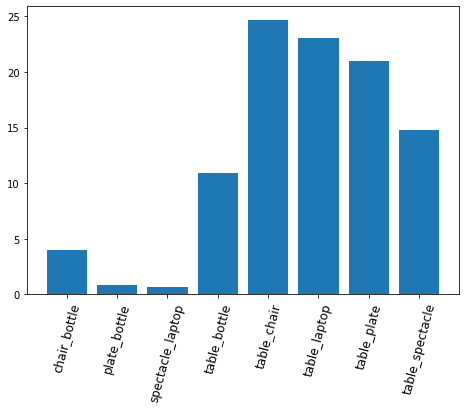

__________________________________________________________________
Input image: table_laptop10_IHS.jpg

probality of chair_bottle:  7.683977484703064

probality of plate_bottle:  0.1223683007992804

probality of spectacle_laptop:  17.272469401359558

probality of table_bottle:  0.21253484301269054

probality of table_chair:  36.63480877876282

probality of table_laptop:  14.28840458393097

probality of table_plate:  1.6162671148777008

probality of table_spectacle:  22.169165313243866


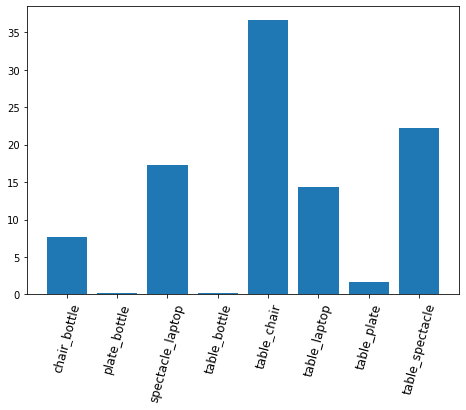

__________________________________________________________________
Input image: table_bottle5_IHS.jpg

probality of chair_bottle:  6.366893649101257

probality of plate_bottle:  0.11554518714547157

probality of spectacle_laptop:  0.0029977540179970674

probality of table_bottle:  76.90523266792297

probality of table_chair:  8.717785775661469

probality of table_laptop:  1.4851618558168411

probality of table_plate:  3.32031212747097

probality of table_spectacle:  3.086080774664879


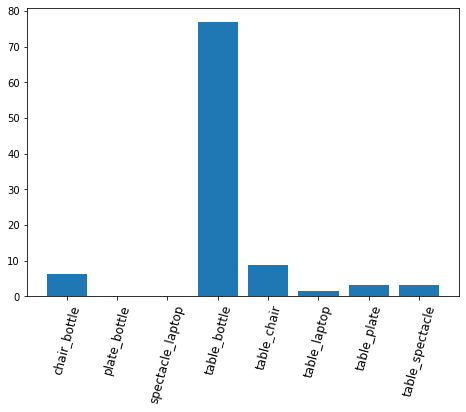

__________________________________________________________________
Input image: plate_bottle0_IHS.jpg

probality of chair_bottle:  1.4501378871500492

probality of plate_bottle:  82.70544409751892

probality of spectacle_laptop:  0.46196505427360535

probality of table_bottle:  3.277954086661339

probality of table_chair:  6.876986473798752

probality of table_laptop:  0.7317473646253347

probality of table_plate:  1.966751366853714

probality of table_spectacle:  2.5290092453360558


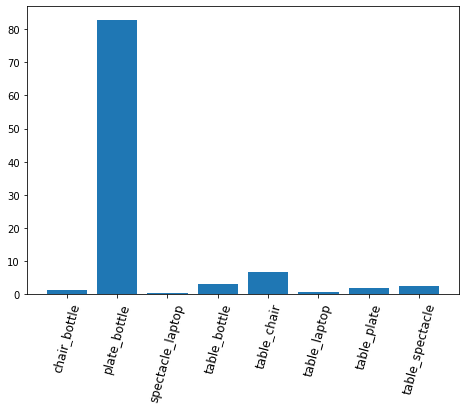

__________________________________________________________________
Input image: specs_laptop25_IHS.jpg

probality of chair_bottle:  27.74638533592224

probality of plate_bottle:  0.31549991108477116

probality of spectacle_laptop:  38.933321833610535

probality of table_bottle:  0.53266491740942

probality of table_chair:  20.30208706855774

probality of table_laptop:  2.7629712596535683

probality of table_plate:  0.5474003497511148

probality of table_spectacle:  8.85966494679451


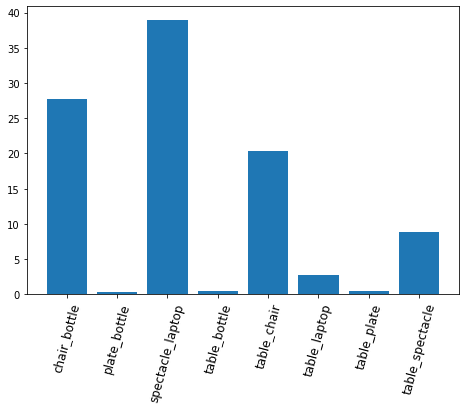

__________________________________________________________________
Input image: table_specs28_IHS.jpg

probality of chair_bottle:  9.656567871570587

probality of plate_bottle:  0.0020680246962001547

probality of spectacle_laptop:  0.01916726032504812

probality of table_bottle:  6.634334474802017

probality of table_chair:  11.004563421010971

probality of table_laptop:  30.7989239692688

probality of table_plate:  4.407560080289841

probality of table_spectacle:  37.47681975364685


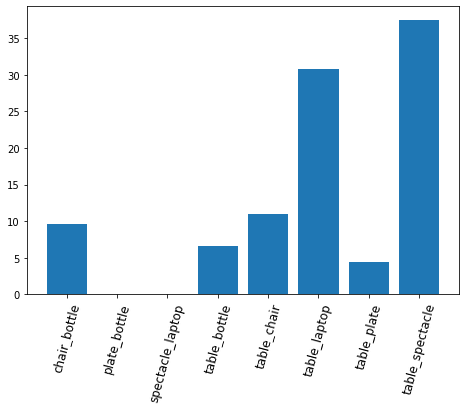

__________________________________________________________________
Input image: chair_bottle1_IHS.jpg

probality of chair_bottle:  80.89186549186707

probality of plate_bottle:  0.002098488221236039

probality of spectacle_laptop:  0.2890993608161807

probality of table_bottle:  3.252989426255226

probality of table_chair:  10.243819653987885

probality of table_laptop:  0.801453273743391

probality of table_plate:  0.14599383575841784

probality of table_spectacle:  4.372661933302879


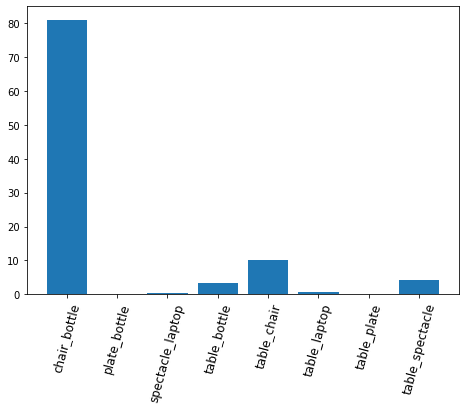

__________________________________________________________________
Input image: table_chair15_IHS.jpg

probality of chair_bottle:  0.18779493402689695

probality of plate_bottle:  8.576363325119019

probality of spectacle_laptop:  0.16423092456534505

probality of table_bottle:  5.55487796664238

probality of table_chair:  14.761096239089966

probality of table_laptop:  16.048482060432434

probality of table_plate:  50.388747453689575

probality of table_spectacle:  4.31840606033802


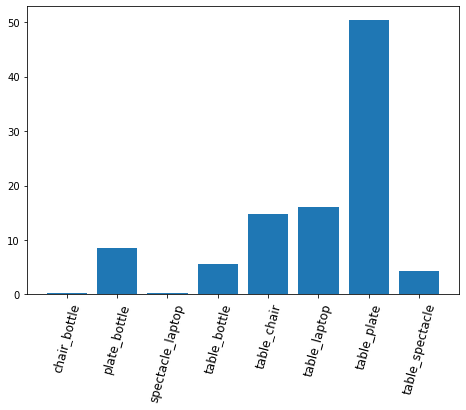

__________________________________________________________________


In [4]:
# make a prediction for a new thermal image.
# importing the required module
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ListPic = {'chair_bottle1_IHS.jpg','plate_bottle0_IHS.jpg','specs_laptop25_IHS.jpg','table_bottle5_IHS.jpg',
          'table_chair15_IHS.jpg','table_laptop10_IHS.jpg','table_plate4_IHS.jpg','table_specs28_IHS.jpg'}



for item in ListPic:
 # load the image thermal
 img1 = load_img(item, target_size=(32, 32))

 # convert to array
 img1 = img_to_array(img1)

 # reshape into a single sample with 3 channels
 img1 = img1.reshape(1,32, 32, 3)

 # prepare pixel data
 img1 = img1.astype('float32')
 img1 = img1 / 255.0

 # prediction od data
 result = model_camera.predict(img1)
 
 print('Input image:',item)
 #print(result)
 print('')
 Bed = result[0][0]*100
 print("probality of chair_bottle: ", Bed)
 print()
 Bottle = result[0][1]*100
 print("probality of plate_bottle: ", Bottle)
 print()
 Chair = result[0][2]*100
 print("probality of spectacle_laptop: ", result[0][2]*100)
 print()
 Laptop = result[0][3]*100
 print("probality of table_bottle: ", result[0][3]*100)
 print()
 Plate = result[0][4]*100
 print("probality of table_chair: ", result[0][4]*100)
 print()
 Sofa = result[0][5]*100   
 print("probality of table_laptop: ", result[0][5]*100)
 print()
 Spectacle = result[0][6]*100
 print("probality of table_plate: ", result[0][6]*100)
 print()
 Table = result[0][7]*100   
 print("probality of table_spectacle: ", result[0][7]*100)
    

  
 fig = plt.figure()
 plt.rcParams['xtick.labelsize'] = 'large' 
 ax = fig.add_axes([0,0,1,1]) 
 

 # x axis values
 x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
 # corresponding y axis values
 y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

 ax.bar(x,y)
 plt.xticks(rotation=75)
 plt.show()   
    
 print("__________________________________________________________________")

 
 
    
 

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_camera.predict([X1_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
classification_metrics = metrics.classification_report(Y1_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y1_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
                  precision    recall  f1-score   support

    chair_bottle       0.60      0.54      0.57        50
    plate_bottle       0.93      0.76      0.84        50
spectacle_laptop       0.73      0.72      0.73        50
    table_bottle       0.78      0.36      0.49        50
     table_chair       0.00      0.00      0.00        50
    table_laptop       0.00      0.00      0.00        50
     table_plate       0.88      0.14      0.24        50
 table_spectacle       0.00      0.00      0.00        50

       micro avg       0.75      0.32      0.44       400
       macro avg       0.49      0.32      0.36       400
    weighted avg       0.49      0.32      0.36       400
     samples avg       0.32      0.32      0.32       400

Confusion Matrix
[[43  1  5  1  0  0  0  0]
 [ 9 38  3  0  0  0  0  0]
 [14  0 36  0  0  0  0  0]
 [31  0  0 18  1  0  0  0]
 [46  1  2  1  0  0  0  0]
 [45  0  3  1  0  0  1  0]
 [40  1  0  2  0  0  7  0]
 [50  0  0  0  

C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Normalized confusion matrix


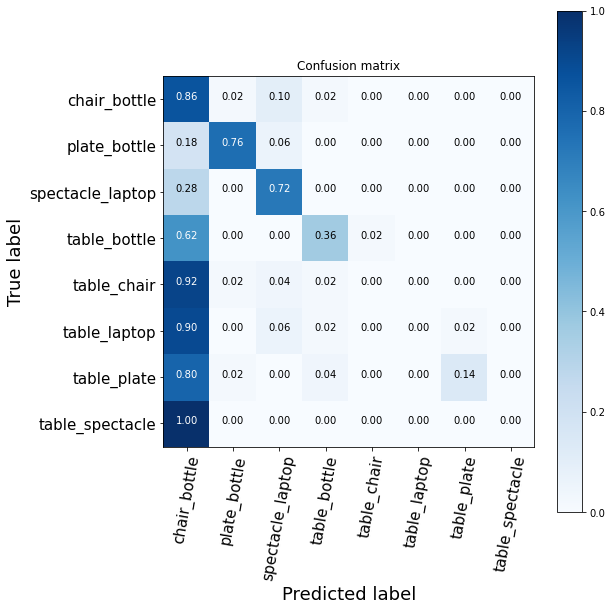

In [6]:
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y1_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
   plt.figure(figsize=(8, 8))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
    
    # Labels, title and ticks
   label_font = {'size':'18'}  # Adjust to fit
   plt.xlabel('Predicted label', fontdict=label_font);
   plt.ylabel('True label', fontdict=label_font);
   plt.tick_params(labelsize = 15) 
   plt.xticks(rotation=80)   
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True) 